# Mini Project 2

**2025 Introduction to Quantitative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

#Import packages for yfinance
import yfinance as yf
import datetime as dt

C:\Users\lucor\AppData\Local\Temp\ipykernel_7836\984161183.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SP_index_2024 = yf.download('^GSPC', start = start_date_2024, end = end_date_2024)
[*********************100%***********************]  1 of 1 completed
C:\Users\lucor\AppData\Local\Temp\ipykernel_7836\984161183.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SP_index_2025 = yf.download('^GSPC', start = start_date_2025, end = end_date_2025)
[*********************100%***********************]  1 of 1 completed


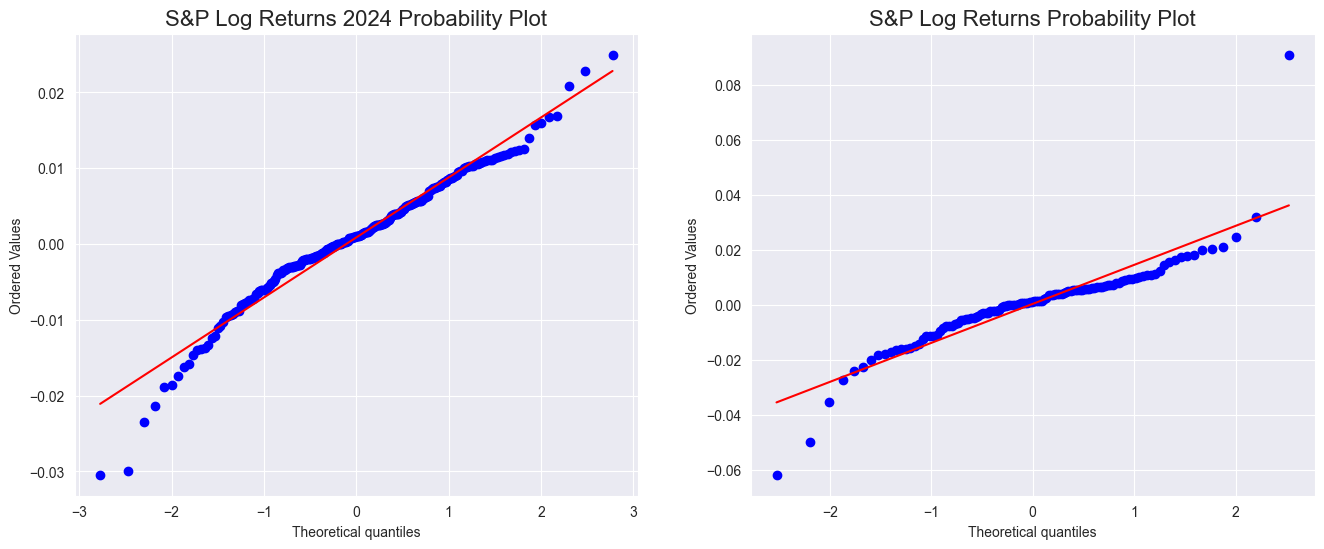

In [3]:
#(1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
#We will explore two time frames, 2024 and 2025, and test if the returns have been log-normal
#2024 was a stable upward trending year.
#2025 has been choppy due to tariffs and international turbulence.

# 2024 Data
start_date_2024 = dt.datetime(2024,1,1)
end_date_2024 = dt.datetime(2024,12,31)

# 2025 Data
start_date_2025 = dt.datetime(2025,1,1)
end_date_2025 = dt.datetime.today()

 # (1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
#S&P500 index data, isolate the logreturn data as a numpy array.
SP_index_2024 = yf.download('^GSPC', start = start_date_2024, end = end_date_2024)
SP_returns_2024 = SP_index_2024['Close']/SP_index_2024['Close'].shift(1)
SP_logreturns_2024 = np.log(SP_returns_2024.dropna())['^GSPC'].values

SP_index_2025 = yf.download('^GSPC', start = start_date_2025, end = end_date_2025)
SP_returns_2025 = SP_index_2025['Close']/SP_index_2025['Close'].shift(1)
SP_logreturns_2025 = np.log(SP_returns_2025.dropna())['^GSPC'].values

# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot S&P log returns
stats.probplot(SP_logreturns_2024, dist="norm", plot=axes[0])
axes[0].set_title("S&P Log Returns 2024 Probability Plot", fontsize=16)
axes[0].grid(True)

stats.probplot(SP_logreturns_2025, dist="norm", plot=axes[1])
axes[1].set_title("S&P Log Returns Probability Plot", fontsize=16)
axes[1].grid(True)

plt.show()

In [4]:
#Collect p-values of normality tests
p_sp_2024=stats.normaltest(SP_logreturns_2024)[1]
p_sp_2025 = stats.normaltest(SP_logreturns_2025)[1]

#Print evidence/non-evidence of normality
print(f"SP log return 2024 distribution: p-value = {p_sp_2024:.4f}")
if p_sp_2024 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 

print(f"S&P log return 2025 distribution: p-value = {p_sp_2025:.4f}")
if p_sp_2025 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

SP log return 2024 distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
S&P log return 2025 distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


Conclusion: The S&P 500 has not had normally distributed log returns within these two time frames.

C:\Users\lucor\AppData\Local\Temp\ipykernel_7836\2441885895.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  NVDA_index_2024 = yf.download('NVDA', start = start_date_2024, end = end_date_2024)
[*********************100%***********************]  1 of 1 completed


C:\Users\lucor\AppData\Local\Temp\ipykernel_7836\2441885895.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  NVDA_index_2025 = yf.download('NVDA', start = start_date_2025, end = end_date_2025)
[*********************100%***********************]  1 of 1 completed


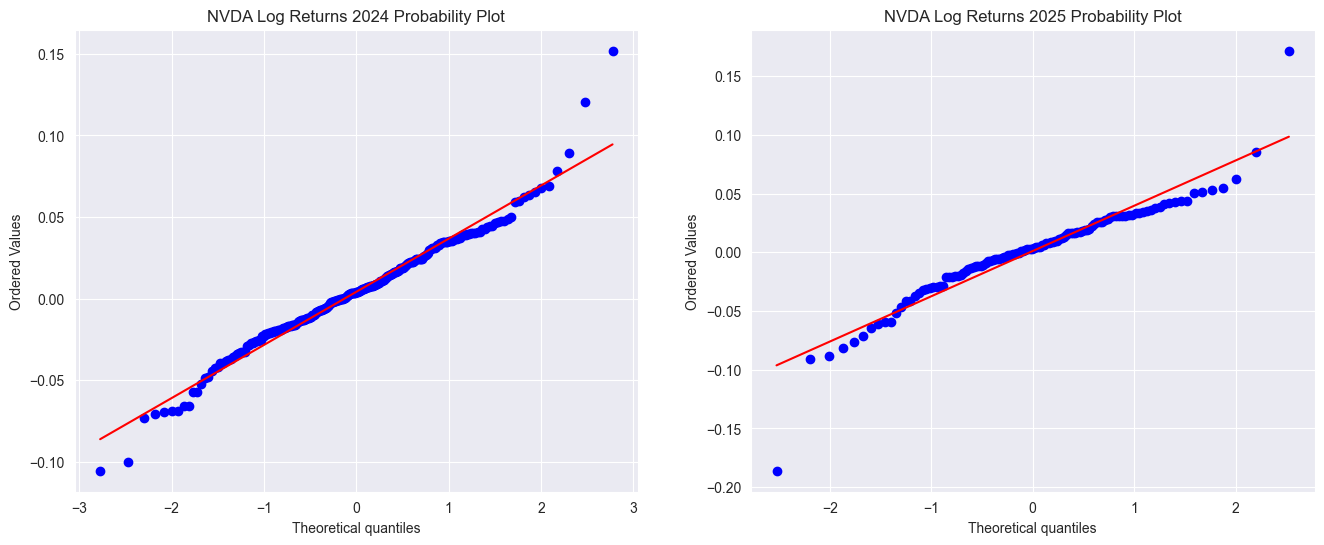

In [11]:
#We will now test a market leader: Nvidia (NVDA), which returned 171% in 2024

#NVDA  data, isolate the logreturn data as a numpy array.
# 2024 Data
start_date_2024 = dt.datetime(2024,1,1)
end_date_2024 = dt.datetime(2024,12,31)

# 2025 Data
start_date_2025 = dt.datetime(2025,1,1)
end_date_2025 = dt.datetime.today()

NVDA_index_2024 = yf.download('NVDA', start = start_date_2024, end = end_date_2024)
NVDA_returns_2024 = NVDA_index_2024['Close']/NVDA_index_2024['Close'].shift(1)
NVDA_logreturns_2024 = np.log(NVDA_returns_2024.dropna())['NVDA'].values

NVDA_index_2025 = yf.download('NVDA', start = start_date_2025, end = end_date_2025)
NVDA_returns_2025 = NVDA_index_2025['Close']/NVDA_index_2025['Close'].shift(1)
NVDA_logreturns_2025 = np.log(NVDA_returns_2025.dropna())['NVDA'].values

# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot S&P log returns
stats.probplot(NVDA_logreturns_2024, dist="norm", plot=axes[0])
axes[0].set_title("NVDA Log Returns 2024 Probability Plot", fontsize=12)
axes[0].grid(True)

stats.probplot(NVDA_logreturns_2025, dist="norm", plot=axes[1])
axes[1].set_title("NVDA Log Returns 2025 Probability Plot", fontsize=12)
axes[1].grid(True)

plt.show()

In [ ]:
#Collect p-values of normality tests
p_NVDA_2024=stats.normaltest(NVDA_logreturns_2024)[1]
p_NVDA_2025 = stats.normaltest(NVDA_logreturns_2025)[1]

#Print evidence/non-evidence of normality
print(f"NVDA log return 2024 distribution: p-value = {p_NVDA_2024:.4f}")
if p_NVDA_2024 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 


print(f"NVDA log return 2025 distribution: p-value = {p_NVDA_2025:.4f}")
if p_NVDA_2025 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

NVDA log return 2024 distribution: p-value = 0.0002
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
S&P log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


Conclusion: Nvidia's log returns were not normally distributed during its stellar uptrend.

C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\4004192517.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  NVDA_index_2024 = yf.download('NVDA', start = start_date_2024, end = end_date_2024)
[*********************100%***********************]  1 of 1 completed

Min Max returns 0.8999540364828994 1.164008807029424
Min Max returns: 1std removed 0.9719339024003449 1.037741118655948
Min Max returns: 2std removed 0.9443333103283639 1.069804248910646
avg returns 1.0047453010983831
avg returns: 1std removed 1.0042232799845958
avg returns: 2std removed 1.0055463528854414


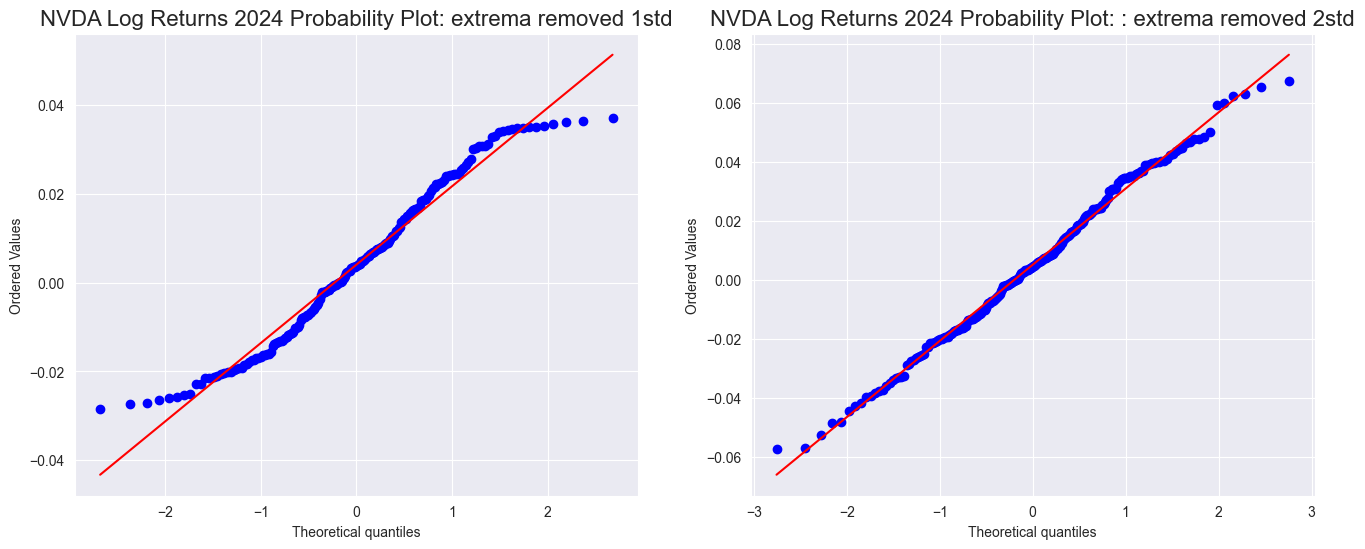

NVDA removed extrema 1std log return 2024 distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
NVDA removed extrema 2std log return 2024 distribution: p-value = 0.2553
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [ ]:
#(2)Test if removing extremal return data creates a distribution with evidence of being normal.

#NVDA  data, isolate the logreturn data as a numpy array.
# 2024 Data
start_date_2024 = dt.datetime(2024,1,1)
end_date_2024 = dt.datetime(2024,12,31)

NVDA_index_2024 = yf.download('NVDA', start = start_date_2024, end = end_date_2024)
NVDA_returns_2024 = NVDA_index_2024['Close']/NVDA_index_2024['Close'].shift(1)

#drop extrema: 
def remove_outliers_std(arr, num_std_dev=2):
    """
    Removes outliers from a NumPy array using the standard deviation method.

    Args:
        arr (np.ndarray): The input NumPy array.
        num_std_dev (float): The number of standard deviations from the mean
                              to consider as the outlier threshold.

    Returns:
        np.ndarray: A new array with outliers removed.
    """
    mean = np.mean(arr)
    std_dev = np.std(arr)
    lower_bound = mean - (num_std_dev * std_dev)
    upper_bound = mean + (num_std_dev * std_dev)
    filtered_arr = arr[(arr >= lower_bound) & (arr <= upper_bound)]
    return filtered_arr

#remove extrema more than one and two standard deviations away
NVDA_returns_2024_exRem1 = remove_outliers_std(NVDA_returns_2024.dropna().values , 1)
NVDA_returns_2024_exRem2 = remove_outliers_std(NVDA_returns_2024.dropna().values , 2)

NVDA_logreturns_2024_exRem1 = np.log(NVDA_returns_2024_exRem1)
NVDA_logreturns_2024_exRem2 = np.log(NVDA_returns_2024_exRem2)


print("Min Max returns" , np.min(NVDA_returns_2024), np.max(NVDA_returns_2024))
print("Min Max returns: 1std removed" , np.min(NVDA_returns_2024_exRem1), np.max(NVDA_returns_2024_exRem1))
print("Min Max returns: 2std removed" , np.min(NVDA_returns_2024_exRem2), np.max(NVDA_returns_2024_exRem2))

print("avg returns" , np.average(NVDA_returns_2024.dropna().values))
print("avg returns: 1std removed" , np.average(NVDA_returns_2024_exRem1))
print("avg returns: 2std removed" , np.average(NVDA_returns_2024_exRem2))

# Create 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot S&P log returns
stats.probplot(NVDA_logreturns_2024_exRem1, dist="norm", plot=axes[0])
axes[0].set_title("NVDA Log Returns 2024 Probability Plot: extrema removed 1std", fontsize=16)
axes[0].grid(True)

stats.probplot(NVDA_logreturns_2024_exRem2, dist="norm", plot=axes[1])
axes[1].set_title("NVDA Log Returns 2024 Probability Plot: : extrema removed 2std", fontsize=16)
axes[1].grid(True)

plt.show()

#Collect p-values of normality tests
p_NVDA_2024_exRem1=stats.normaltest(NVDA_logreturns_2024_exRem1)[1]
p_NVDA_2024_exRem2=stats.normaltest(NVDA_logreturns_2024_exRem2)[1]

#Print evidence/non-evidence of normality
print(f"NVDA removed extrema 1std log return 2024 distribution: p-value = {p_NVDA_2024_exRem1:.4f}")
if p_NVDA_2024_exRem1 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

print(f"NVDA removed extrema 2std log return 2024 distribution: p-value = {p_NVDA_2024_exRem2:.4f}")
if p_NVDA_2024_exRem2 < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")
    
print('--'*40) 
print('--'*40) 


Conclusion: removing extreme values may provide a normal distribution of log returns.

C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\2224549670.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  NVDA_index = yf.download('NVDA', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\2224549670.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  MSFT_index = yf.download('MSFT', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\2224549670.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  TSLA_index = yf.download('TSLA', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\2224549670.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  META_index = yf.download('META', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\lucor\AppData\Local\Temp\ipykernel_2280\2224549670.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True

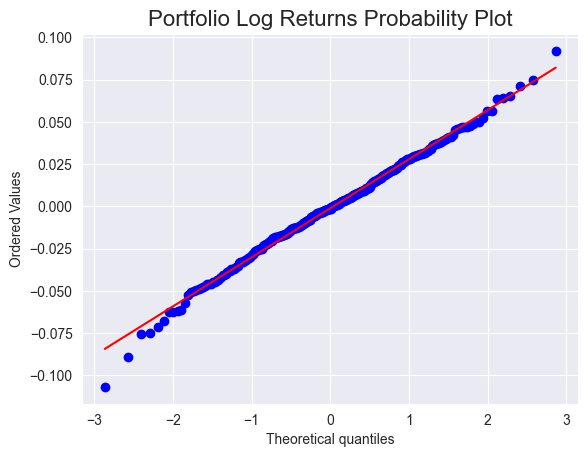

Portfolio log return distribution: p-value = 0.1038
→ No statistically significant evidence against normality.
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [ ]:
#(3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
#see problem (4)

#(4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
#Port - Nvda, Msft, Tsla, Meta, Nflx, Pltr, Crwv, Mvst, Txrh, Bitcoin
#For brevity will only consider Nvda, Msft, Tsla, Meta, and Nflx. Equal initial weightings
#Note Crwv is a 2025 IPO and Bitcoin trades daily, rather than 252 days per year.

start_date = dt.datetime(2021,11,1) #This time frame found to be longest time of possibly normal log returns
end_date = dt.datetime(2023,3,1)

NVDA_index = yf.download('NVDA', start = start_date, end = end_date)
NVDA_returns = (NVDA_index['Close']/NVDA_index['Close'].shift(1)).dropna()

MSFT_index = yf.download('MSFT', start = start_date, end = end_date)
MSFT_returns = (MSFT_index['Close']/MSFT_index['Close'].shift(1)).dropna()

TSLA_index = yf.download('TSLA', start = start_date, end = end_date)
TSLA_returns = (TSLA_index['Close']/TSLA_index['Close'].shift(1)).dropna()

META_index = yf.download('META', start = start_date, end = end_date)
META_returns = (META_index['Close']/META_index['Close'].shift(1)).dropna()

NFLX_index = yf.download('NFLX', start = start_date, end = end_date)
NFLX_returns = (NFLX_index['Close']/NFLX_index['Close'].shift(1)).dropna()

Port_returns = 1/5*(NVDA_returns['NVDA'] + MSFT_returns['MSFT'] + META_returns['META'] + TSLA_returns['TSLA'] + NFLX_returns['NFLX'])
Port_logreturns = np.log(Port_returns).values


# Plot portfolio log returns
fig, axes = plt.subplots()
stats.probplot(Port_logreturns, dist="norm", plot=axes)
axes.set_title("Portfolio Log Returns Probability Plot", fontsize=16)
axes.grid(True)

plt.show()

#Collect p-values of normality tests
p_Port=stats.normaltest(Port_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"Portfolio log return distribution: p-value = {p_Port:.4f}")
if p_Port < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

print('--'*40) 
print('--'*40) 

Conclusion: For this tech heavy portfolio, the longest time I found in recent market history that the log returns could be interpreted as normally distributed was a sixteen month period from November 2021 to March 2023. Notably, the market entered a downturn in 2022. 

In [ ]:
# (5) Gather x-number of historical stock data and just perform a normality test on   their log return data 
#  to see if any of the stocks exhibit evidence of log returns that are normally distributed.
#
# See problem (4)